In [41]:

import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import Model
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

OneHotEncoder()

In [44]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/project2020/archive/main/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((28,28))
    img = np.array(img)
    if(img.shape == (28,28,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [45]:
# This cell updates result list for images without tumor
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/project2020/archive/main/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
for path in paths:
    img = Image.open(path)
    img = img.resize((28,28))
    img = np.array(img)
    if(img.shape == (28,28,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [46]:
data = np.array(data)
data.shape

(2891, 28, 28, 3)

In [47]:
result = np.array(result)
result = result.reshape(2891,2)

In [48]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [49]:
from keras.models import Sequential
from keras import models, layers
import keras
#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,3), padding="same"))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding="valid"))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding="valid"))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))

#Output Layer with softmax activation
model.add(layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])




In [50]:

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_4 (Averag  (None, 27, 27, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 23, 23, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 11, 11, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 120)         48120     
                                                                 
 flatten_2 (Flatten)         (None, 5880)             

In [51]:
y_train.shape

(2312, 2)

In [52]:
history = model.fit(x_train, y_train, batch_size=20, epochs=150, verbose=1, validation_data=(x_test, y_test))


Epoch 1/150
116/116 [==============================] - 2s 8ms/step - loss: 0.5818 - accuracy: 0.7085 - val_loss: 0.5295 - val_accuracy: 0.7668
Epoch 2/150
116/116 [==============================] - 1s 6ms/step - loss: 0.5102 - accuracy: 0.7638 - val_loss: 0.4892 - val_accuracy: 0.7720
Epoch 3/150
116/116 [==============================] - 1s 5ms/step - loss: 0.4984 - accuracy: 0.7617 - val_loss: 0.5421 - val_accuracy: 0.7358
Epoch 4/150
116/116 [==============================] - 1s 5ms/step - loss: 0.5170 - accuracy: 0.7483 - val_loss: 0.5110 - val_accuracy: 0.7530
Epoch 5/150
116/116 [==============================] - 1s 5ms/step - loss: 0.4862 - accuracy: 0.7751 - val_loss: 0.4758 - val_accuracy: 0.8031
Epoch 6/150
116/116 [==============================] - 1s 5ms/step - loss: 0.4823 - accuracy: 0.7725 - val_loss: 0.4719 - val_accuracy: 0.7634
Epoch 7/150
116/116 [==============================] - 1s 5ms/step - loss: 0.4706 - accuracy: 0.7837 - val_loss: 0.4638 - val_accuracy: 0.7668

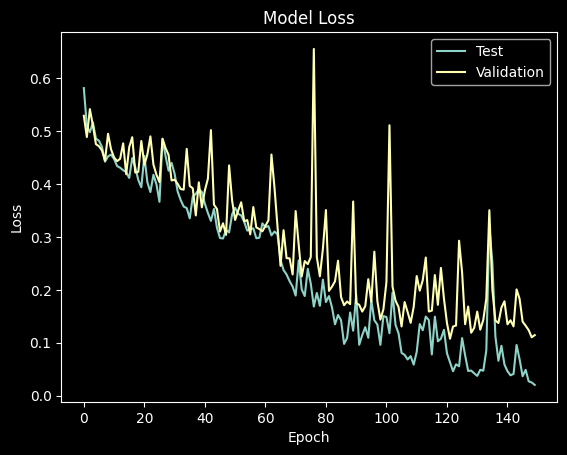

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [63]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

99.99343156814575% Confidence This Is No, Its not a tumor


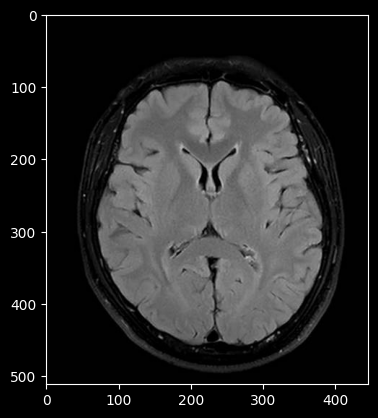

In [78]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/project2020/archive/pred/pred53.jpg")
x = np.array(img.resize((28,28)))
x = x.reshape(1,28,28,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [79]:
from sklearn.metrics import classification_report,confusion_matrix

In [80]:
y_pred=model.predict(x_test)

19/19 [==============================] - 0s 2ms/step


In [81]:
y_pred = (y_pred > 0.5)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       298
           1       0.97      0.97      0.97       281

   micro avg       0.97      0.97      0.97       579
   macro avg       0.97      0.97      0.97       579
weighted avg       0.97      0.97      0.97       579
 samples avg       0.97      0.97      0.97       579



In [83]:
import numpy as np

# Assuming y_test and y_pred are your true and predicted labels respectively

# Convert multilabel-indicator format to binary format
y_test_binary = np.argmax(y_test, axis=1)
y_pred_binary = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

print(cm)

[[290   8]
 [  8 273]]


In [84]:
model.save("/content/drive/MyDrive/saved model/lenet-brain-tumor-detection.h5")
